# Setup

In [46]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

"In this chapter, we will start by looking at the Linear Regression model, one of the  
simplest models there is. We will discuss two very different ways to train it:  
- Using a direct “closed-form” equation that directly computes the model parameters  
that best fit the model to the training set (i.e., the model parameters that  
minimize the cost function over the training set).  
- Using an iterative optimization approach, called Gradient Descent (GD), that  
gradually tweaks the model parameters to minimize the cost function over the  
training set, eventually converging to the same set of parameters as the first  
method. We will look at a few variants of Gradient Descent that we will use again  
and again when we study neural networks in Part II: Batch GD, Mini-batch GD,  
and Stochastic GD." 


"Next we will look at Polynomial Regression, a more complex model that can fit nonlinear  
datasets. Since this model has more parameters than Linear Regression, it is  
more prone to overfitting the training data, so we will look at how to detect whether  
or not this is the case, using learning curves, and then we will look at several regularization  
techniques that can reduce the risk of overfitting the training set."  

"Finally, we will look at two more models that are commonly used for classification  
tasks: Logistic Regression and Softmax Regression." 

# Linear Regression Using the Normal Equation 

![title](images/linear_regression_1.png)
![title](images/linear_regression_2.png)


"In Chapter 2 we saw that the most common performance measure  
of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). Therefore,  
to train a Linear Regression model, you need to find the value of θ that minimizes  
the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)  
than the RMSE, and it leads to the same result (because the value that minimizes a  
function also minimizes its square root)."

![title](images/cost_function.png)


# # Linear Regression Using the Normal Equation

![title](images/normal_equation.png)



Generating some random data

In [47]:

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


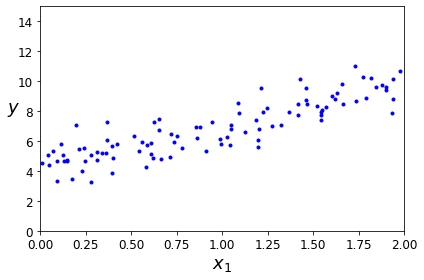

In [48]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [49]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X] 
# Equation above!
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

"The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise.  
Let’s see what the equation found:"

In [50]:
theta_best


array([[4.21509616],
       [2.77011339]])

"We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close  
enough, but the noise made it impossible to recover the exact parameters of the original  
function"

"Now you can make predictions using θ:"

In [51]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

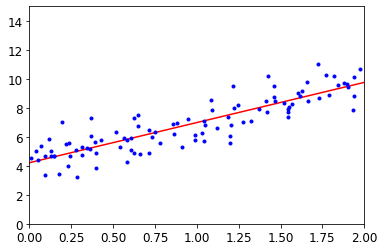

In [52]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [53]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [54]:
lin_reg.predict(X_new)


array([[4.21509616],
       [9.75532293]])

"The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:"

In [55]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

"This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the   Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:"

In [56]:
np.linalg.pinv(X_b).dot(y)


array([[4.21509616],
       [2.77011339]])

## Computational Complexity

"The Normal Equation computes the inverse of XT · X, which is an n × n matrix  
(where n is the number of features). The computational complexity of inverting such a  
matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In  
other words, if you double the number of features, you multiply the computation  
time by roughly 22.4 = 5.3 to 23 = 8."

WARNING: "The Normal Equation gets very slow when the number of features  
grows large (e.g., 100,000)."

"On the positive side, this equation is linear with regards to the number of instances in  
the training set (it is O(m)), so it handles large training sets efficiently, provided they  
can fit in memory."

"Also, once you have trained your Linear Regression model (using the Normal Equation  
or any other algorithm), predictions are very fast: the computational complexity  
is linear with regards to both the number of instances you want to make predictions  
on and the number of features. In other words, making predictions on twice as many  
instances (or twice as many features) will just take roughly twice as much time."

"Now we will look at very different ways to train a Linear Regression model, better  
suited for cases where there are a large number of features, or too many training  
instances to fit in memory."

# Gradient Descent

"Gradient Descent is a very generic optimization algorithm capable of finding optimal  
solutions to a wide range of problems. The general idea of Gradient Descent is to  
tweak parameters iteratively in order to minimize a cost function."

"Suppose you are lost in the mountains in a dense fog; you can only feel the slope of  
the ground below your feet. A good strategy to get to the bottom of the valley quickly  
is to go downhill in the direction of the steepest slope. This is exactly what Gradient  
Descent does: it measures the local gradient of the error function with regards to the  
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient  
is zero, you have reached a minimum!"

"Concretely, you start by filling θ with random values (this is called random initialization),  
and then you improve it gradually, taking one baby step at a time, each step  
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges  
to a minimum (see Figure 4-3)." 


![title](images/gradient_descent.png)


"An important parameter in Gradient Descent is the size of the steps, determined by  
the learning rate hyperparameter. If the learning rate is too small, then the algorithm  
will have to go through many iterations to converge, which will take a long time (see  
Figure 4-4)."


![title](images/gradient_descent_2.png)


"On the other hand, if the learning rate is too high, you might jump across the valley  
and end up on the other side, possibly even higher up than you were before. This  
might make the algorithm diverge, with larger and larger values, failing to find a good  
solution (see Figure 4-5)."

![title](images/gradient_descent_3.png)


"Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,  
plateaus, and all sorts of irregular terrains, making convergence to the minimum very  
difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the random  
initialization starts the algorithm on the left, then it will converge to a local minimum,  
which is not as good as the global minimum. If it starts on the right, then it will  
take a very long time to cross the plateau, and if you stop too early you will never  
reach the global minimum."

![title](images/gradient_descent_4.png)


"Fortunately, the MSE cost function for a Linear Regression model happens to be a  
convex function, which means that if you pick any two points on the curve, the line  
segment joining them never crosses the curve. This implies that there are no local  
minima, just one global minimum. It is also a continuous function with a slope that  
never changes abruptly.4 These two facts have a great consequence: Gradient Descent  
is guaranteed to approach arbitrarily close the global minimum (if you wait long  
enough and if the learning rate is not too high)."

"In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if  
the features have very different scales. Figure 4-7 shows Gradient Descent on a training  
set where features 1 and 2 have the same scale (on the left), and on a training set  
where feature 1 has much smaller values than feature 2 (on the right). Since feature 1 is smaller,   
it takes a larger change in θ1 to affect the cost function, which is why the bowl is
elongated along the θ1 axis."




![title](images/gradient_descent_5.png)


"As you can see, on the left the Gradient Descent algorithm goes straight toward the  
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction  
almost orthogonal to the direction of the global minimum, and it ends with a long  
march down an almost flat valley. It will eventually reach the minimum, but it will  
take a long time."

WARNING: "When using Gradient Descent, you should ensure that all features  
have a similar scale (e.g., using Scikit-Learn’s StandardScaler  
class), or else it will take much longer to converge."

## Batch Gradient Descent

"To implement Gradient Descent, you need to compute the gradient of the cost function  
with regards to each model parameter θj. In other words, you need to calculate   
how much the cost function will change if you change θj just a little bit. This is called  
a partial derivative. It is like asking “what is the slope of the mountain under my feet  
if I face east?” and then asking the same question facing north (and so on for all other  
dimensions, if you can imagine a universe with more than three dimensions). Equation  
4-5 computes the partial derivative of the cost function with regards to parameter  
θj"

![title](images/batch_gradient_descent.png)

"Instead of computing these gradients individually, you can use Equation 4-6 to compute  
them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial  
derivatives of the cost function (one for each model parameter)."

![title](images/batch_gradient_descent_2.png)

"Once you have the gradient vector, which points uphill, just go in the opposite direction  
to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the  
learning rate η comes into play:6 multiply the gradient vector by η to determine the  
size of the downhill step (Equation 4-7)."

![title](images/batch_gradient_descent_3.png)



WARNING: "Notice that 4.6 involves calculations over the full training  
set X, at each Gradient Descent step! This is why the algorithm is  
called Batch Gradient Descent: it uses the whole batch of training  
data at every step. As a result it is terribly slow on very large training  
sets (but we will see much faster Gradient Descent algorithms  
shortly). However, Gradient Descent scales well with the number of  
features; training a Linear Regression model when there are hundreds  
of thousands of features is much faster using Gradient  
Descent than using the Normal Equation."

In [57]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


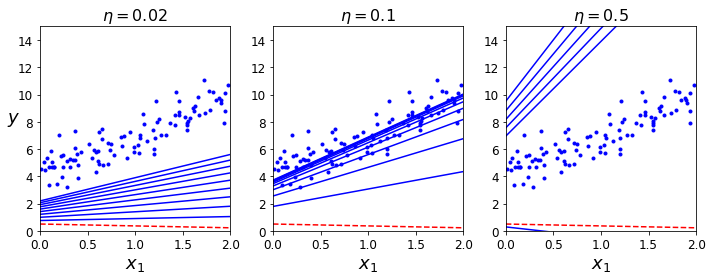

In [58]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [59]:
# learning rate
eta = 0.1  
n_iterations = 1000
m = 100

# random initialization
theta = np.random.randn(2,1)  

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [60]:
theta


array([[4.21509616],
       [2.77011339]])

"Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly.  
But what if you had used a different learning rate eta? Figure 4-8 shows the  
first 10 steps of Gradient Descent using three different learning rates (the dashed line  
represents the starting point)."

![title](images/batch_gradient_descent_4.png)

"On the left, the learning rate is too low: the algorithm will eventually reach the solution,  
but it will take a long time. In the middle, the learning rate looks pretty good: in  
just a few iterations, it has already converged to the solution. On the right, the learning  
rate is too high: the algorithm diverges, jumping all over the place and actually  
getting further and further away from the solution at every step."



TIP: "To find a good learning rate, you can use grid search (see Chapter 2). However, you  
may want to limit the number of iterations so that grid search can eliminate models  
that take too long to converge."

TIP 2: "You may wonder how to set the number of iterations. If it is too low, you will still be  
far away from the optimal solution when the algorithm stops, but if it is too high, you  
will waste time while the model parameters do not change anymore. A simple solution  
is to set a very large number of iterations but to interrupt the algorithm when the  
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny  
number ϵ (called the tolerance)—because this happens when Gradient Descent has  
(almost) reached the minimum."

## Stochastic Gradient Descent

"The main problem with Batch Gradient Descent is the fact that it uses the whole  
training set to compute the gradients at every step, which makes it very slow when  
the training set is large. At the opposite extreme, Stochastic Gradient Descent just  
picks a random instance in the training set at every step and computes the gradients  
based only on that single instance. Obviously this makes the algorithm much faster  
since it has very little data to manipulate at every iteration. It also makes it possible to  
train on huge training sets, since only one instance needs to be in memory at each  
iteration (SGD can be implemented as an out-of-core algorithm.7)"

"On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much  
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches  
the minimum, the cost function will bounce up and down, decreasing only on average.  
Over time it will end up very close to the minimum, but once it gets there it will  
continue to bounce around, never settling down (see Figure 4-9). So once the algorithm  
stops, the final parameter values are good, but not optimal."

![title](images/stochastic_gradient_descent.png)

"When the cost function is very irregular (as in Figure 4-6), this can actually help the  
algorithm jump out of local minima, so Stochastic Gradient Descent has a better  
chance of finding the global minimum than Batch Gradient Descent does."


Learning Schedule 

"Therefore randomness is good to escape from local optima, but bad because it means   
that the algorithm can never settle at the minimum. One solution to this dilemma is  
to gradually reduce the learning rate. The steps start out large (which helps make  
quick progress and escape local minima), then get smaller and smaller, allowing the  
algorithm to settle at the global minimum. This process is called simulated annealing,  
because it resembles the process of annealing in metallurgy where molten metal is  
slowly cooled down. The function that determines the learning rate at each iteration  
is called the learning schedule. If the learning rate is reduced too quickly, you may get  
stuck in a local minimum, or even end up frozen halfway to the minimum. If the  
learning rate is reduced too slowly, you may jump around the minimum for a long  
time and end up with a suboptimal solution if you halt training too early."

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [61]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


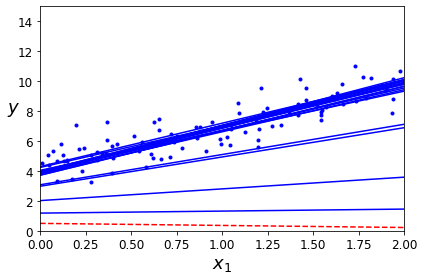

In [62]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show() 

"By convention we iterate by rounds of m iterations; each round is called an epoch.  
While the Batch Gradient Descent code iterated 1,000 times through the whole training  
set, this code goes through the training set only 50 times and reaches a fairly good  
solution"

In [63]:
theta


array([[4.21076011],
       [2.74856079]])

"To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe  
gressor class, which defaults to optimizing the squared error cost function. The following  
code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the  
default learning schedule (different from the preceding one), and it does not use any  
regularization (penalty=None; more details on this shortly):"

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# Note y.ravel() flattens y 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [65]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.24365286]), array([2.8250878]))

## Mini Batch Gradient Descent

"The last Gradient Descent algorithm we will look at is called Mini-batch Gradient  
Descent. It is quite simple to understand once you know Batch and Stochastic Gradient  
Descent: at each step, instead of computing the gradients based on the full training  
set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch   
GD computes the gradients on small random sets of instances called minibatches.  
The main advantage of Mini-batch GD over Stochastic GD is that you can  
get a performance boost from hardware optimization of matrix operations, especially  
when using GPUs."
 
"The algorithm’s progress in parameter space is less erratic than with SGD, especially  
with fairly large mini-batches. As a result, Mini-batch GD will end up walking  
around a bit closer to the minimum than SGD. But, on the other hand, it may be  
harder for it to escape from local minima (in the case of problems that suffer from  
local minima, unlike Linear Regression as we saw earlier)."


"Figure 4-11 shows the  
paths taken by the three Gradient Descent algorithms in parameter space during  
training. They all end up near the minimum, but Batch GD’s path actually stops at the  
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.  
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic  
GD and Mini-batch GD would also reach the minimum if you used a good learning  
schedule."

![title](images/comparison_1.png)

NOTE: "There is almost no difference after training: all these algorithms  
end up with very similar models and make predictions in exactly  
the same way."

![title](images/comparison_2.png)
![title](images/comparison_3.png)



In [66]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [67]:
theta


array([[4.25214635],
       [2.7896408 ]])

In [68]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


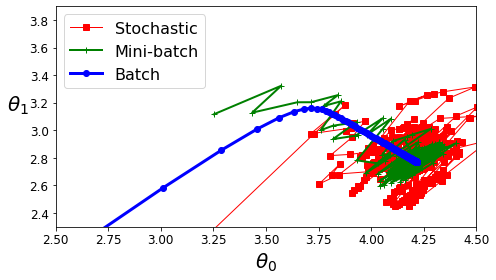

In [69]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()